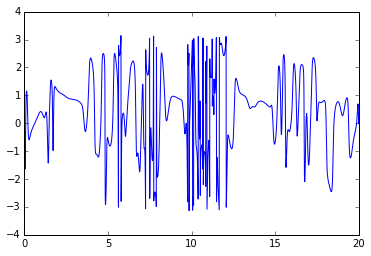

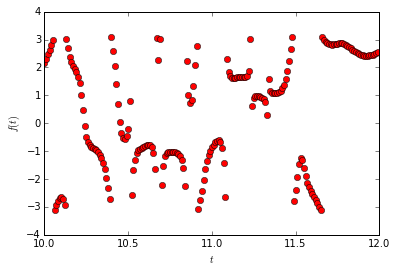

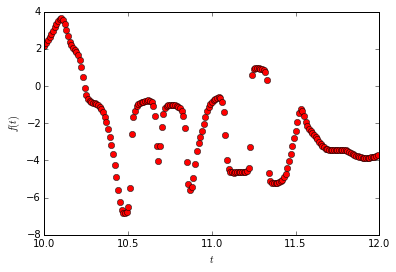

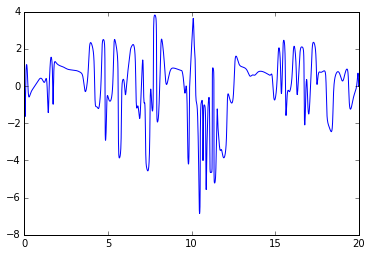

In [54]:
import sys
import numpy as np
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
%matplotlib inline


if __name__=='__main__':

	"""
	kMul = 6
	dtime = .01
	iter = 10000

	kGoal = int(sys.argv[1])
	Tpulse = np.double(sys.argv[2])
	kWidGoal = int(sys.argv[3])

	init = iniData(kWidGoal = kWidGoal, dt = dtime, LoadFileIterNum=iter, knumload = 12*kMul+1, 
				knum=12*kMul+1, kPosGoal=kGoal, kPosGoalLoad=kGoal,
			 		T_pulse = Tpulse, ChooseFile = 'LOAD')

    ctrlc, ctrls = init.ctrl_c, init.ctrl_s
	#x, y = init.plot_At(init.ctrl_c, init.ctrl_s, tin = 0)
	"""
	
	
	loadname1 = 'xy.dat'
	data1 = np.loadtxt(loadname1)
	x = data1[:,0]
	y = data1[:,1]

	pl.plot(x,y)
#	pl.plot(x[NNi:NNf],y[NNi:NNf])
	pl.show()
    
	NNi = 1000
	NNf = 1200
	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()
    

	remode(y)
#	remode(y)
#	remode(y)
#	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
#	pl.show()
	pos = []
	for i in range(2,len(y)):
		if (y[i]-y[i-1] )*(y[i-1] - y[i-2]) < -.5:
			pos.append(i)
			#y[i] = 2 * np.pi + y[i] #- (y[i]+2*np.pi) 
#			print i-1, y[i-1]
#	print pos
#	print y
#	print sum(y)/len(y), sum(x)/len(x)
#	x -= sum(x)/len(x)
#	y -= sum(y)/len(y)
#	print pos[1], pos[-1]
	y[pos[1]:pos[-2]] = y[pos[1]:pos[-2]] + 2*np.pi
	#window = 21
	#poly = 2
	#y = savgol_filter(y, window, poly)

	lon = len(y)
#	print lon
	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()

	pl.plot(x,y)
#	pl.plot(x[NNi:NNf],y[NNi:NNf])
	pl.show()
#!!!	y = np.append(y,np.zeros(lon))

2000 1001


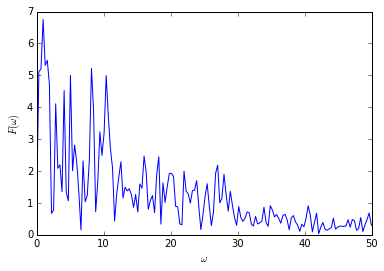

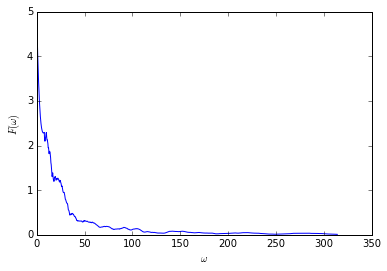

In [2]:
	dt = .01
	t0 = -10
	xf = np.fft.rfftfreq(lon, dt)*2*np.pi
	fac = np.exp(-1j*xf*t0)
	yf = (np.fft.rfft(y)) *dt * fac
	yphs = yf/abs(yf)
	dxf = np.diff(xf[1:3])
#	print dxf
#	print sum(np.real(1j*(np.diff(yphs)/dxf)/yphs[1:]))/len(yphs)
#	pl.plot(xf,yphs.real, xf, yphs.imag)
#	pl.xlim([0,10])    
#	pl.show()
	print len(y), len(yf)
	yf2 = (abs(yf))**2
	hbd = max(yf2)
	#yff = [yf[i] if yf2[i]>.01*hbd else 0 for i in range(len(yf))]
	#yff = [yf[i] for i in range(len(yf)) if yf2[i]>.01*hbd]
	#xff = [xf[i] for i in range(len(yf)) if yf2[i]>.01*hbd]
	window = 51 
	poly = 3 
	yffabs = savgol_filter(abs(yf), window, poly)
	yff = yffabs * yf/abs(yf)
#	yff = yf
	
	#yffr = savgol_filter(yf.real, window, poly)
	#yffi = savgol_filter(yf.imag, window, poly)
	#yff = yffr+1j*yffi
	pl.plot(xf[:],np.absolute(yf[:]))
	#pl.plot(xf[:],np.imag(yf[:]))
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.xlim([0,50])
	pl.show()
    
	pl.plot(xf[:], np.absolute(yff[:]))
	#pl.plot(xf[:], np.imag(yff[:]))
#	pl.semilogx(xf[:],yf[:])
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
#	pl.xlim((-15,15))
	pl.show()	

Check: http://stackoverflow.com/questions/24077913/discretized-continuous-fourier-transform-with-numpy

[ 12.87521099   1.16517285] [ 11.65433156  -0.52661178]


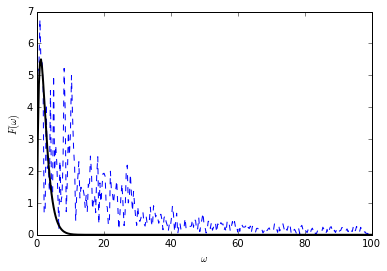

4.03514340727 12.8752109889


In [3]:
	func2 = lambda xdata, a, s : a * xdata * np.exp(-(xdata/s))
	func3 = lambda xdata, a, s : a * np.exp(-(xdata/s))
	func = lambda xdata, a, s: a* np.exp(-(xdata/s)**2)
#	print len(yf)
	fbd = 20#len(yf)
	popt2, pcov2 = curve_fit(func2, xf[:fbd], np.double(abs(yf[:fbd])))
	print popt2, sum(pcov2)
	y2 = func2(xf, popt2[0], popt2[1])
	y2 = y2 * yf/abs(yf)
	pl.plot(xf,abs(yf),'--')
	pl.plot(xf,abs(y2),'k', linewidth = 2.)# *yff/abs(yff))
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.xlim([0,100])
	pl.show()
	print np.sqrt(2/np.pi)*(2/popt2[1])**3, popt2[0]

2000 2000


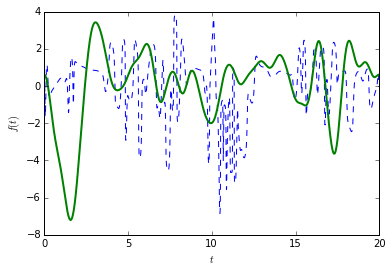

In [4]:
	xi = np.fft.rfftfreq(2*lon-1, (xf[1]-xf[0])/2)
	yi = np.fft.irfft(yff)*2/dt
	y2i = np.fft.irfft(y2)*2/dt
	print len(xi), len(yi)
	pl.plot(x,y,'--')
	#pl.plot(x, yi, 'k',linewidth = 2.0)
	pl.plot(x, y2i, 'g', linewidth = 2.)
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()
#	print [i for i in y2i/abs(y2i)]
#	print sum([1 for i in y2i if i>0 ])
#	print sum([-1 for i in y2i if i<=0 ])

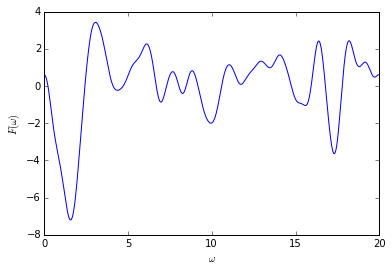

In [5]:
	savename = 'xiyi.dat'
	np.savetxt(savename,np.column_stack((x,y2i)))

	loadname2 = 'xiyi.dat'
	data2 = np.loadtxt(loadname2)

	xl = data2[:,0]
	yl = data2[:,1]

	pl.plot(xl,yl)
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.show()
    
    

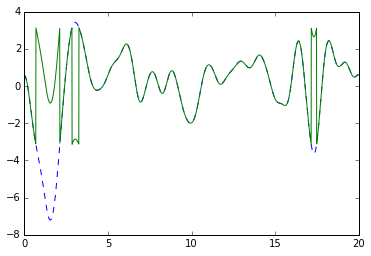

In [6]:
	"""
	xlf = np.fft.rfftfreq(lon, dt)#*2*np.pi
	ylf = (np.fft.rfft(yl))*dt
	pl.plot(xlf,abs(ylf))
	pl.show()
	"""
	ycos, ysin = np.cos(yl), np.sin(yl)
	yexp = ycos + 1j * ysin
	yy  = np.real(-1j*np.log(yexp))
	pl.plot(xl, yl, '--')
	pl.plot(xl, yy) 
	pl.show()

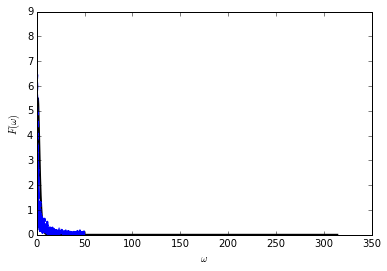

In [7]:
	xxf = np.fft.rfftfreq(lon, dt)#*2*np.pi
	yyf = (np.fft.rfft(yy))*dt
	pl.plot(xf, abs(y2),"k", linewidth = 2.)
	pl.plot(xxf,abs(yyf),"--",linewidth = 2.)
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.show()

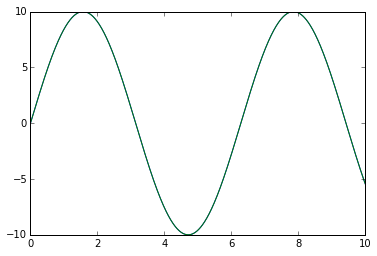

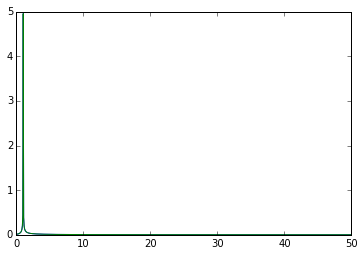

In [56]:
TT = 100
dtt = .01
tt = np.linspace(0, TT, int(TT/dtt))
yy = 10*np.sin(1*tt)# + 3 * np.sin(3*tt)
zz = np.real(-1j*np.log(np.cos(yy) +1j*np.sin(yy)))

pl.xlim([0,10])
pl.plot(tt,yy)
#pl.plot(tt,zz)
ff = remode(zz)
ff = remode(ff)
#ff = remode(ff)
pl.plot(tt,ff)
pl.show()


ttfr = np.fft.rfftfreq(len(yy), dtt) * 2*np.pi
yyfr = np.fft.rfft(yy)*dtt/TT
zzfr = np.fft.rfft(zz)*dtt/TT
pl.plot(ttfr,abs(yyfr))
pl.plot(ttfr,abs(zzfr))
pl.xlim([0,50])
pl.show()

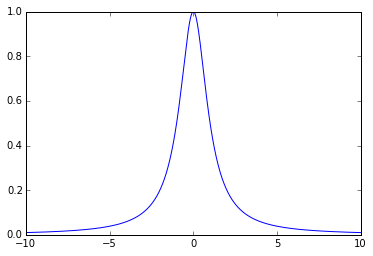

40000 40000


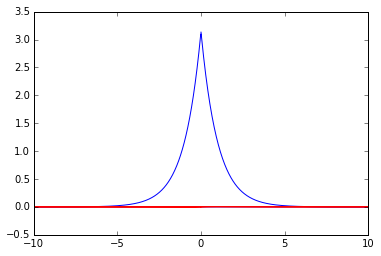

In [32]:
t0 = -200
t1 = -t0
dt1 = .01

ts = np.linspace(t0,t1,(t1-t0)/dt1)
sd = 1.
#fs = np.sin(10*ts)
fs = 1 / ((1/sd)**2 + ts**2)
pl.plot(ts, fs)
pl.xlim([-10,10])
pl.show()


tsw = np.fft.fftfreq(len(fs),dt1) * 2*np.pi
fsw = np.fft.fft(fs)* dt1 * np.exp(-1j*tsw*t0)
print len(fs), len(fsw)
pl.plot(tsw, fsw.real,'b')
pl.plot(tsw, fsw.imag,'r')
pl.xlim([-10,10])
pl.show()